<a href="https://colab.research.google.com/github/Elismar13/metodos-numericos/blob/main/Regress%C3%A3o_Linear_ElismarSilvaPereira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>__MÉTODOS NUMÉRICOS__</center>
## <center>__PROJETO DA UNIDADE 2__</center>

#### <center>__ALUNO: Elismar Silva Pereira__</center>

<div class="alert alert-block alert-info">
1. INTRODUÇÃO
</div>


Neste trabalho será apresentado o conceito da regressão linear, visando apresentar a teoria, o problema a ser solucionado, diferentes abordagens para a construção do algoritmo e seus respectivos comportamentos, exemplos práticos e aplicações reais. Por fim será apresentado as conclusões e resultados obtidos ao utilizar esta abordagem para resolver problemas reais, de forma a expor a importância do estudo do tema abordado.

A regressão linear surgiu no ramo da estatística e tem como objetivo modelar a relação entre uma resposta escalar e uma ou mais variáveis ​​​dependentes e independentes). Por conta desta característica, a regressão linear passou a ser adotada no sub-ramo da inteligência artificial, o Machine Learning, e hoje o algoritmo é considerado como fundamental nos modelos supervisionados de machine learning, por conta de sua simplicidade e propriedades bem difundidas.

Alguns exemplos de aplicações reais consiste em: Estimação de gastos com combustíveis, entendimento da relação entre entre a dosagem do medicamento e a pressão arterial dos pacientes, medição do efeito de fertilizantes e água no rendimento das cultivas,  dentre outros vários outros problemas do dia a dia que podem ser resolvidos, estimados e descritos. Como exemplo prático deste trabalho, a regressão linear será utilizada para predição de dados de saúde.


<div class="alert alert-block alert-info">
2. DESCRIÇÃO DO PROBLEMA
</div>

  A diabetes é uma doença cronica caracterizada pelo aumento dos níveis de açúcar no sangue, o que pode provocar danos em vários órgãos, se não for tratado. O número de casos de pessoas com diabetes vem crescendo nos últimos anos, tornando-se um ponto de atenção para a sociedade, por conta de suas consequências e complicações. A diabetes apresentam diferentes níveis, tendo como processo de diagnostico um série de medições de diversas substancias do corpo humano, como por exemplo a insulina e a glicemia, resultando assim em um índice o qual determina se a pessoa possui ou não diabetes. 

  A prevenção da diabetes é um ponto importante para as pessoas, principalmente para os mais velhos, apesar de que os jovens não estão imunes a doença, o que torna o processo de prevenção necessário e muito importante para evitar as complicações. 

<div class="alert alert-block alert-info">
3. MÉTODOS APLICADOS À SOLUÇÃO
</div>

Neste trabalho será abordados os seguintes métodos:

* Algoritmos para encontrar a solução dos mínimos quadrados:
  * Método Cholesky:
    * Consistem em um método o qual pode ser aplicado em uma matriz A que tem posto completo, a sua pseudo-inversa é uma matriz definida positiva quadrada hermitiana. 
    * é considerado instável em alguns casos, principalmente em aplicações com grandes matrizes. Não é recomendado o uso no geral.
    * Equação:
![equacao_Cholesky](data/Cholesky.png)

  * Método fatorização QR: 
    * Aplicação similar ao método Cholesky. Resulta em uma sistema triangular superior que basta ser resolvido para obter o resultado. 
    * É um pouco mais lento que o método Cholesky, mas é mais estável e menos suscetível a erros.  
![QR](data/QR.png)

  * Método fatorização SVD (Singular Value Decomposition ou Decomposição em Valores Singulares): 
    * Aplicação similar ao método Cholesky. Resulta em uma sistema triangular superior que basta ser resolvido para obter o resultado. 
    * É um pouco mais lento que o método Cholesky, mas é mais estável e menos suscetível a erros. 
    * Equação:
    ![SVD](data/SVD.png)
* Erro Quadrático Médio (Mean squared error):
  * Podemos encontrar o erro de um sistema a partir deste mecanismo.
 

<div class="alert alert-block alert-info">
4. IMPLEMENTAÇÃO
</div>

Nesta etapa será demonstrado uma implementação da regressão linear para predição de diabetes. Para isto as seguintes bibliotecas e seus repectivos módulos serão utilizados:

- Numpy
- sklearn

Como primeiro passo iremos importar as bibliotecas mencionadas.

In [ ]:
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import math, scipy, numpy as np
from scipy import linalg

Em seguida um dos datasets exemplos da biblioteca *sklearn* será carregado, mais especificamente o dataset das diabetes. Ao analisar as informações do dataset a partir da chamada do atributo que contém uma breve descrição da estrutura do dataset (*DESCR*), podemos observar que:


In [ ]:
data = datasets.load_diabetes()

In [ ]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Podemos perceber as caractecteristicas do dataset, tais como: quantidade de linhas, qual coluna apresenta a medida da progressão da doença em um ano, a descrição de cada coluna, informações adicionais, etc.

Com o conhecimento das informações necessárias, podemos começar o processo de separaçã de dados e treinamento do modelo de regressão linear. Primeiramente iremos separar os dados de treinamento e testes, usando a função *train_test_split* do sklearn.

In [ ]:
feature_names=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
trn,test,y_trn,y_test = train_test_split(data.data, data.target, test_size=0.2)

In [ ]:
trn.shape, test.shape

((353, 10), (89, 10))

Em seguida criaremos o modelo de regressão linear. Para isto usarei a implementação da biblioteca sklearn.linear_model.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

O próximo passo será treinar o modelo. Para isto usaremos as seguintes variáveis:

* **Variável independente: train_x**
*  **Variável Dependente: train_y ,**

In [ ]:
model.fit(trn, y_trn)

LinearRegression()

Com o modelo treinado, agora é hora de realizar a predição das linhas separadas para testes.

In [ ]:
model.predict(test)

array([145.784992  , 160.31996525, 219.43249665, 227.74375732,
       169.20069436, 201.4041852 , 148.96012694, 148.89712834,
       109.57757716, 175.56174585,  61.33566328, 192.21531289,
       216.36392381, 240.18390334, 166.26666653,  58.52973596,
       173.38421052, 222.60119143, 156.25132977,  48.82924725,
       187.1487475 , 223.56244733, 161.03111572, 185.13354455,
       204.58666394, 173.68579953, 184.2599118 , 128.8012411 ,
       137.73302682, 204.77951119,  67.89037279,  70.3124422 ,
       243.43790677, 119.61224334, 140.37208495, 200.03856733,
       189.6574988 , 223.86409093, 173.97417526,  29.34428164,
       139.56669466, 129.49819679, 177.58990848,  92.82871447,
       176.42929863, 237.22607213, 200.28624718, 205.09123273,
       190.88325652, 118.46014575, 107.27846399, 161.10500702,
       196.89316352, 118.36334733,  55.58577776,  46.15779862,
        65.35539786, 163.48457906, 141.53052573, 141.39415154,
       183.77548218, 126.89843817, 182.66336068, 125.87

Por fim iremos calcular o erro absoluto médio e o erro quadrático médio:

In [ ]:
def regr_metrics(act, pred):
    return (math.sqrt(metrics.mean_squared_error(act, pred)), 
     metrics.mean_absolute_error(act, pred))

In [ ]:
mean_squared_error, mean_absolute_error = regr_metrics(y_test, model.predict(test))
print(f"Erro quadrático médio: {mean_squared_error}; Erro absoluto médio: {mean_absolute_error}")

Erro quadrático médio: 52.48557165133283; Erro absoluto médio: 44.52029015891651


<div class="alert alert-block alert-info">
5. CASOS DE USO
</div>

Agora aplicando os conhecimentos dos tópicos anteriores em um novo problema: Seria possível prever e estimar o valor de venda dos carros tesla, tendo em consideração resultado já alcançados em diferentes períodos de venda?

Resposta: É impossível prever o futoro. Mas, podemos estimar valores com o uso de modelos matemáticos, de forma a gerar expectativas de vendas.

Para realizar esta abordagem, as seguintes biliotecas serão utilizadas:

* Numpy - para processamento de dados, algebra linear, etc.
* Pandas - para representação dos dados.
* Sklearn - para separação de dados e aplicação da regressão linear.
* Matplotlib - para vizualização dos dados.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Primeiramente irei importar o dataset disponível no seguinte link: https://raw.githubusercontent.com/alpharithms/data/main/TSLA.csv

In [ ]:
DATASET_LOCATION = "https://raw.githubusercontent.com/alpharithms/data/main/TSLA.csv"
df = pd.read_csv(DATASET_LOCATION)

Resumo do dataset:

In [ ]:
print(df.describe())

             Open        High         Low       Close   Adj Close  \
count  253.000000  253.000000  253.000000  253.000000  253.000000   
mean   289.108428  297.288412  280.697937  289.997067  289.997067   
std    167.665389  171.702889  163.350196  168.995613  168.995613   
min     74.940002   80.972000   70.101997   72.244003   72.244003   
25%    148.367996  154.990005  143.222000  149.792007  149.792007   
50%    244.296005  245.600006  237.119995  241.731995  241.731995   
75%    421.390015  430.500000  410.579987  421.200012  421.200012   
max    699.989990  718.719971  691.119995  705.669983  705.669983   

             Volume  
count  2.530000e+02  
mean   7.530795e+07  
std    4.013706e+07  
min    1.735770e+07  
25%    4.713450e+07  
50%    7.025550e+07  
75%    9.454550e+07  
max    3.046940e+08  


Filtragem de colunas e dados não utilizados no momento:

In [ ]:
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)

In [ ]:
df = df[['Adj Close']]

In [ ]:
print(df)

             Adj Close
Date                  
2020-01-02   86.052002
2020-01-03   88.601997
2020-01-06   90.307999
2020-01-07   93.811996
2020-01-08   98.428001
...                ...
2020-12-24  661.770020
2020-12-28  663.690002
2020-12-29  665.989990
2020-12-30  694.780029
2020-12-31  705.669983

[253 rows x 1 columns]


Em seguida criaremos uma coluna que armazenará a MME, um tipo de média móvel (MA) que coloca um peso e uma significância maiores nos pontos de dados mais recentes, esta muito utilizada no sertor de investimentos.

FORMULA DA MME

Para realizar este calculo, farei uso da biblioteca *pandas_ta*, uma extensão da bilioteca Pandas que contém diversos indicadores e suas respectivas funções para realizar esse trabalho.

In [ ]:
!pip install pandas_ta

     |████████████████████████████████| 115 kB 4.0 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=7c46222ea7c51a853d5ce58bd5f86936dc1a8a93e1596b5fc3138ffffc7f998e
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [ ]:
import pandas_ta

In [ ]:
df.ta.ema(close='Adj Close', length=10, append=True)

Date
2020-01-02           NaN
2020-01-03           NaN
2020-01-06           NaN
2020-01-07           NaN
2020-01-08           NaN
                 ...    
2020-12-24    643.572394
2020-12-28    647.230141
2020-12-29    650.641022
2020-12-30    658.666296
2020-12-31    667.212421
Name: EMA_10, Length: 253, dtype: float64

Podemos verificar a nova estrutura do DataFrame:

In [ ]:
print(df.head(10))


             Adj Close     EMA_10
Date                             
2020-01-02   86.052002        NaN
2020-01-03   88.601997        NaN
2020-01-06   90.307999        NaN
2020-01-07   93.811996        NaN
2020-01-08   98.428001        NaN
2020-01-09   96.267998        NaN
2020-01-10   95.629997        NaN
2020-01-13  104.972000        NaN
2020-01-14  107.584000        NaN
2020-01-15  103.699997  96.535599


Existe linhas com valores não numéricos (NaN), para contornar esse problema irei fazer um pequeno filtro para remover estas linhas inválidas.

In [ ]:
df = df.dropna()
df.head(10)

,Adj Close,EMA_10
Date,,
2020-01-15,103.699997,96.535599
2020-01-16,102.697998,97.656035
2020-01-17,102.099998,98.464028
2020-01-21,109.440002,100.459660
2020-01-22,113.912003,102.905540
2020-01-23,114.440002,105.002715
2020-01-24,112.963997,106.450221
2020-01-27,111.603996,107.387271
2020-01-28,113.379997,108.476858


Pronto! Agora iremos começar o processo da regressão linear em si, começando com a separação de dados de teste e treinamento.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['Adj Close']], df[['EMA_10']], test_size=0.2)

In [ ]:
print(X_test.describe())

        Adj Close
count   49.000000
mean   289.874939
std    167.553729
min    102.697998
25%    153.457993
50%    200.179993
75%    425.679993
max    649.880005


In [ ]:
print(X_train.describe())

        Adj Close
count  195.000000
mean   298.993487
std    168.278367
min     72.244003
25%    155.318001
50%    278.855988
75%    421.570007
max    705.669983


Posteriormente, começaremos a treinar o modelo e realizar as predições:

In [ ]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

In [ ]:
model2.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model2.predict(X_test)

Exibindo algumas métricas importantes para validação do modelo:

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("Model Coefficients:", model2.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[0.95226959]]
Mean Absolute Error: 14.580774044197325
Coefficient of Determination: 0.9821788014663813


E expondo os resultados graficamente, teremos o seguinte comportamento:

In [ ]:
result_test = y_test.values.tolist()
result_pred = y_pred[:10]

Referencias:



https://www.analyticsvidhya.com/blog/2020/10/examining-the-simple-linear-regression-method-for-forecasting-stock-prices-using-excel/

https://dvinvest.com.br/aprenda/blog/medias-moveis-aprenda-como-utilizar-as-medias-moveis-para-auxiliar-suas-operacoes

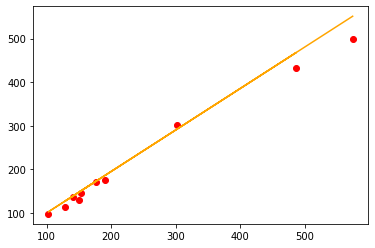

In [ ]:
plt.scatter(X_test[:10], result_test[:10], color='red')

plt.plot(X_test[:10], result_pred[:10], color='orange')
plt.show()

